# Redukcja wymiarowości i klasteryzacja

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
## Brak printowania warningsów
import warnings
warnings.filterwarnings("ignore")

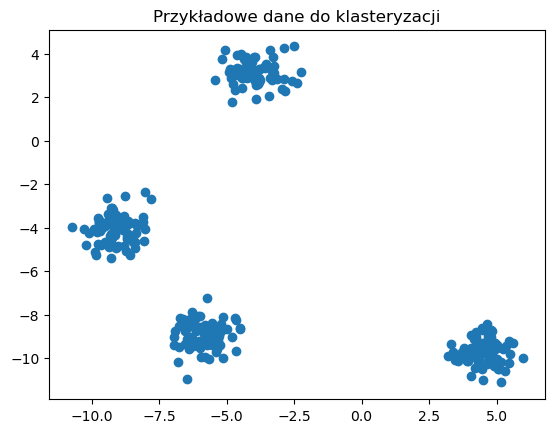

In [3]:
# Tworzymy losowy zbiór danych składający się z 300 próbek podzielonych na 4 klastry.
data, labels = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=21)

# Wizualizacja danych na wykresie.
plt.scatter(data[:, 0], data[:, 1])
plt.title("Przykładowe dane do klasteryzacji")
plt.show()


C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


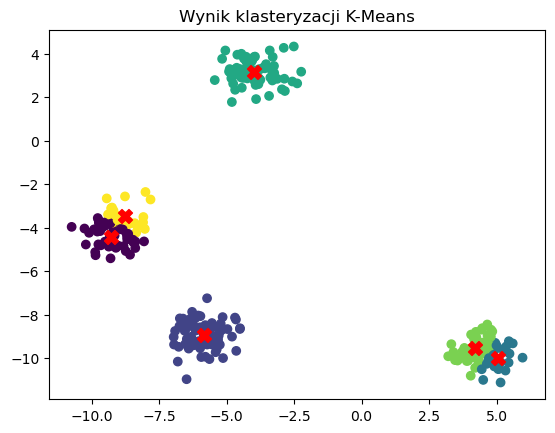

In [16]:
# Wykorzystujemy algorytm K-Means do znalezienia 4 klastrów.
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data)
clusters = kmeans.predict(data)
#clusters = kmeans.fit_predict(data) # alternatywa dla 2 wyższych linijek

# Wizualizacja wyników klasteryzacji.
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')
plt.title("Wynik klasteryzacji K-Means")
plt.show()


### Ćwiczenie: 
Wykonaj klasteryzację dla innej liczby centr.


## Metoda Elbow do wyboru optymalnej liczby klastrów
Obliczamy wartość bezwładności (inertia) dla różnych wartości k.

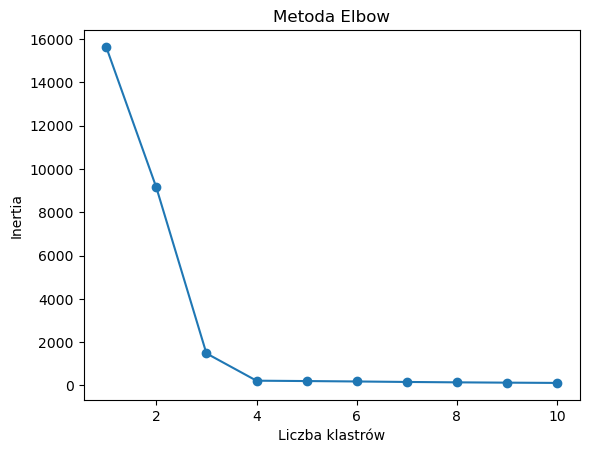

In [19]:
# Obliczamy wartość bezwładności (inertia) dla różnych wartości k.
def plotuj_elbow(df, k_values = range(1, 11)):
    inertia = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    
    # Wizualizacja metody Elbow na wykresie.
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Inertia')
    plt.title('Metoda Elbow')
    plt.show()

plotuj_elbow(data)

### Ćwiczenie: 
Wykonaj analizę Elbow dla innego zbioru danych.


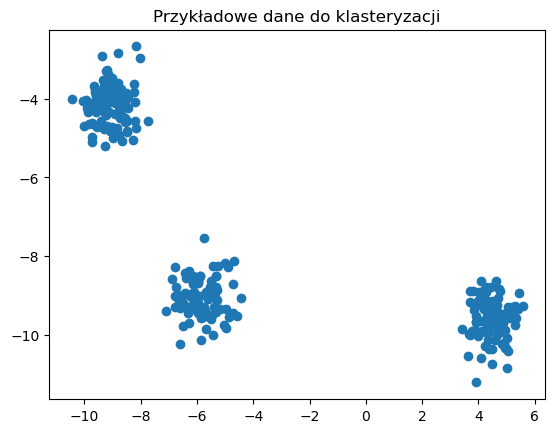

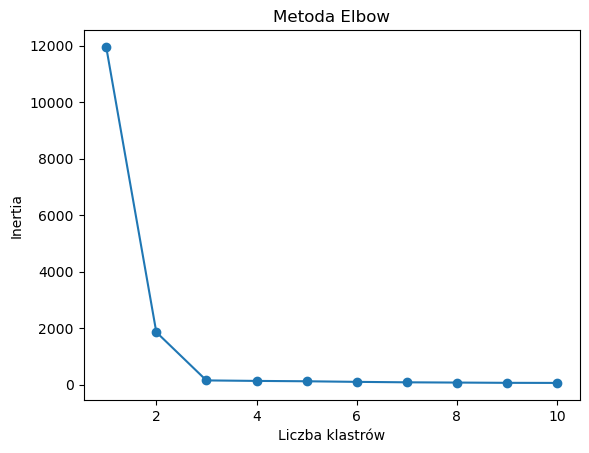

In [22]:
# Tworzymy losowy zbiór danych składający się z 300 próbek podzielonych na 4 klastry.
data2, labels2 = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=21)

# Wizualizacja danych na wykresie.
plt.scatter(data2[:, 0], data2[:, 1])
plt.title("Przykładowe dane do klasteryzacji")
plt.show()

plotuj_elbow(data2)

## AHCA

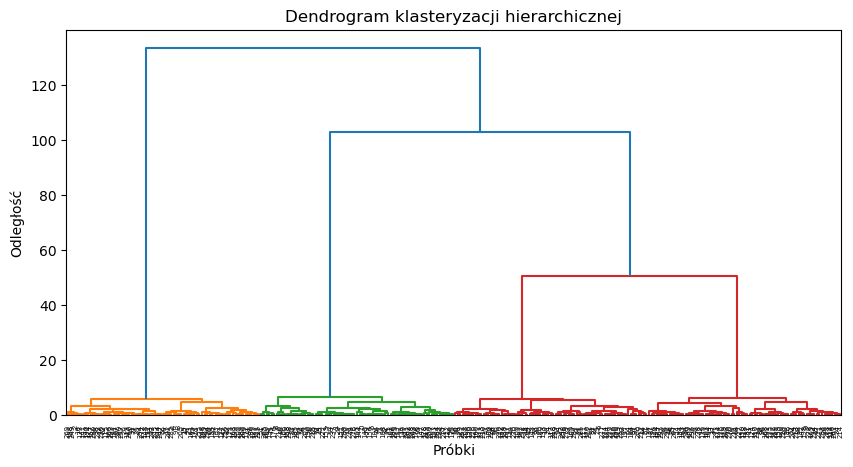

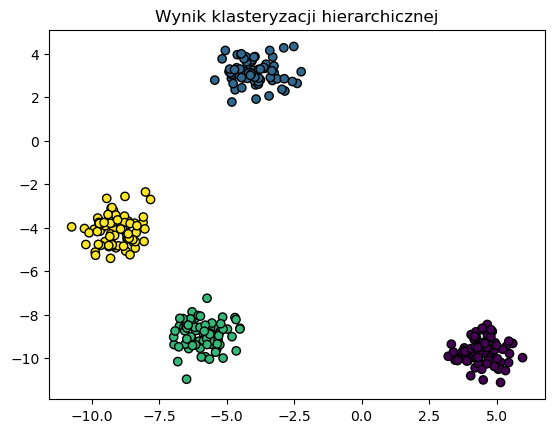

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Obliczanie hierarchicznej klasteryzacji
Z = linkage(data, method='ward')

# Wizualizacja dendrogramu
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram klasteryzacji hierarchicznej")
plt.xlabel("Próbki")
plt.ylabel("Odległość")
plt.show()

# Tworzenie klastrów na podstawie wysokości przecięcia dendrogramu
num_clusters = 4
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Wizualizacja klastrów
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.title("Wynik klasteryzacji hierarchicznej")
plt.show()

## DBScan

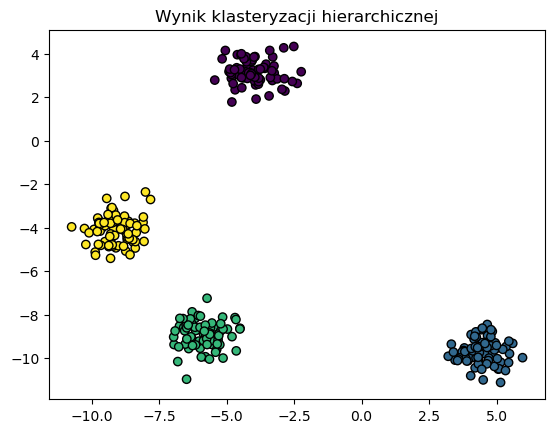

In [41]:
from sklearn.cluster import DBSCAN

# Zastosowanie DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(data)

# Wizualizacja klastrów
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.title("Wynik klasteryzacji hierarchicznej")
plt.show()

## Silhouette

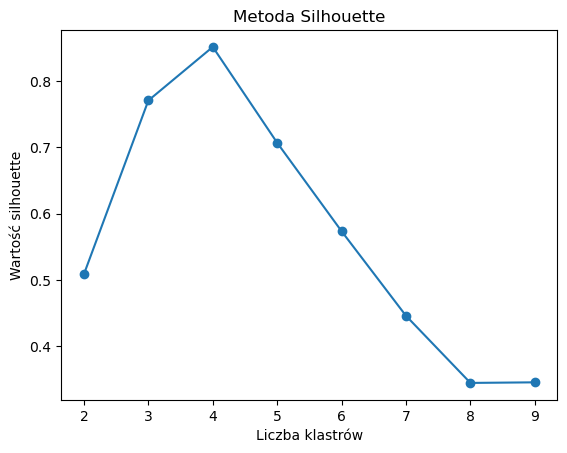

In [34]:
# Obliczamy wskaźnik Silhouette, który mierzy jakość klasteryzacji.
def plotuj_silhouette(df, k_values = range(2,11)):
    silhouettes = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        silhouettes.append(silhouette_score(df, kmeans.fit_predict(df)))

    # Wizualizacja metody Silhouette na wykresie.
    plt.plot(k_values, silhouettes, marker='o')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Wartość silhouette')
    plt.title('Metoda Silhouette')
    plt.show()
    
plotuj_silhouette(data, k_values=range(2,10))

### Ćwiczenie:
Napisz silhouette pod różne poziomy eps dla DBSCAN

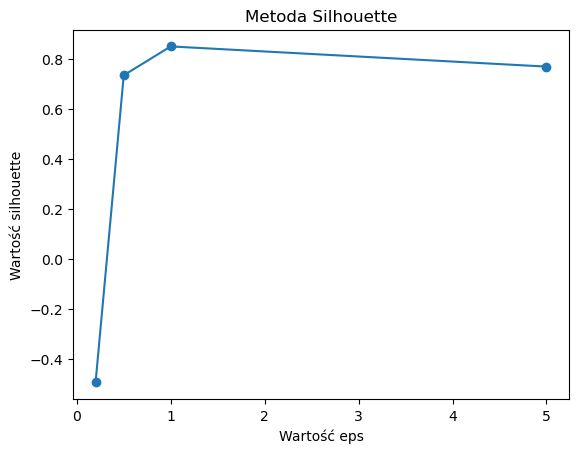

In [47]:
silhouettes = []
epss = [0.2, 0.5, 1, 5]

for eps in epss:
    dbscan = DBSCAN(eps=eps, min_samples=min_sample)
    silhouettes.append(silhouette_score(data, dbscan.fit_predict(data)))
    
plt.plot(epss, silhouettes, marker='o')
plt.xlabel('Wartość eps')
plt.ylabel('Wartość silhouette')
plt.title('Metoda Silhouette')
plt.show()

## Redukcja wymiarowości - PCA

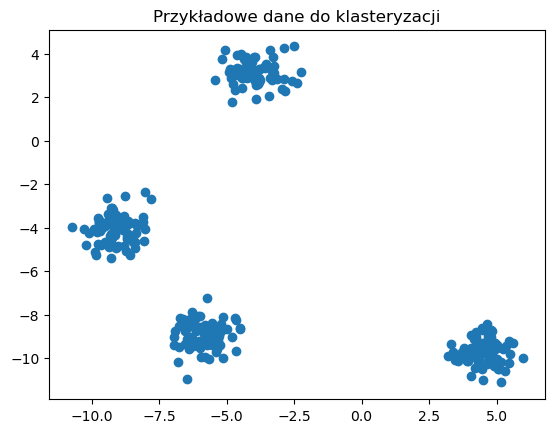

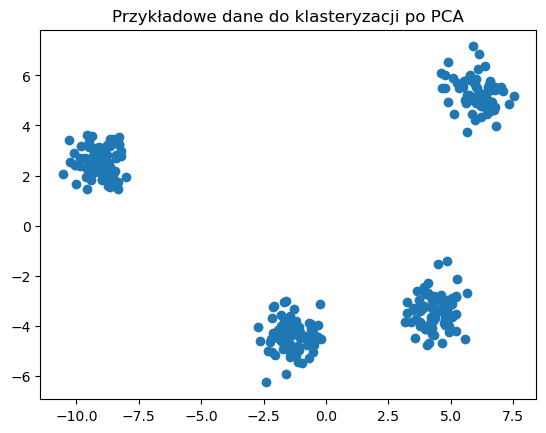

In [50]:
pca = PCA()
data_pca = pca.fit_transform(data)


plt.scatter(data[:, 0], data[:, 1])
plt.title("Przykładowe dane do klasteryzacji")
plt.show()

plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title("Przykładowe dane do klasteryzacji po PCA")
plt.show()

In [63]:
iris_scaled.var(axis = 0)

array([1., 1., 1., 1.])

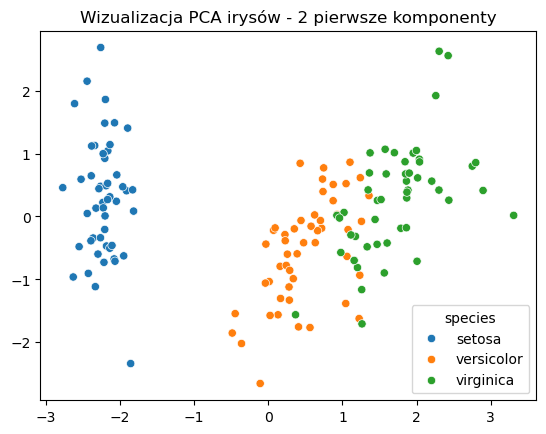

In [69]:
iris = sns.load_dataset("iris")  # Klasyczny zbiór dotyczący kwiatów irysów
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.drop(columns = ['species']))

pca = PCA(n_components = 3) # n_components
pca_iris = pca.fit_transform(iris_scaled)

sns.scatterplot(x = pca_iris[:, 0], y = pca_iris[:, 1], hue = iris['species'])
plt.title("Wizualizacja PCA irysów - 2 pierwsze komponenty")
plt.show()

In [70]:
# Tworzenie komponentów
print(iris.columns)
display(pca.components_)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274]])

In [72]:
pca.explained_variance_ratio_

0.9948212908928453

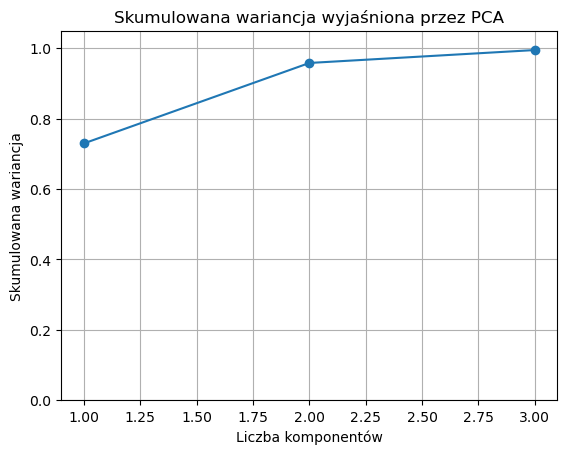

In [73]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Wizualizacja skumulowanej wariancji
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wariancja')
plt.title('Skumulowana wariancja wyjaśniona przez PCA')
plt.ylim([-0,1.05])
plt.grid()
plt.show()

In [74]:
print(f"Procent wyjaśnionej wariancji: {pca.explained_variance_ratio_}")


Procent wyjaśnionej wariancji: [0.72962445 0.22850762 0.03668922]


### Ćwiczenie: 
Zmodyfikuj liczbę komponentów w PCA i sprawdź, jak to wpływa na wyniki.

## Klasteryzacja K-Means po PCA

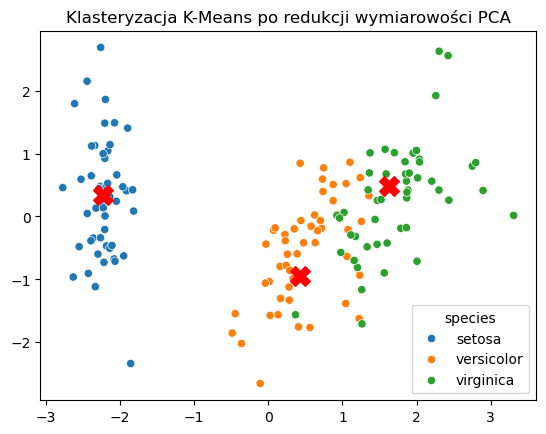

In [84]:
# Ponownie wykonujemy klasteryzację K-Means na zredukowanych danych.
kmeans_pca = KMeans(n_clusters=3, random_state=21)
kmeans_pca.fit(pca_iris)
clusters_pca = kmeans_pca.predict(pca_iris)

# Wizualizacja wyników po redukcji wymiarowości PCA.
sns.scatterplot(x = pca_iris[:, 0], y = pca_iris[:, 1], hue=iris['species'])
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("Klasteryzacja K-Means po redukcji wymiarowości PCA")
plt.show()

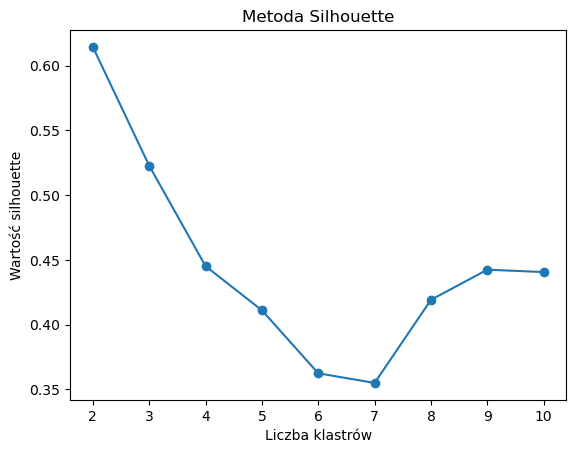

In [85]:
plotuj_silhouette(pca_iris[:,:2])

### Ćwiczenie: 
Porównaj wyniki klasteryzacji przed i po PCA.

## Przykład, gdzie K-Means nie działa

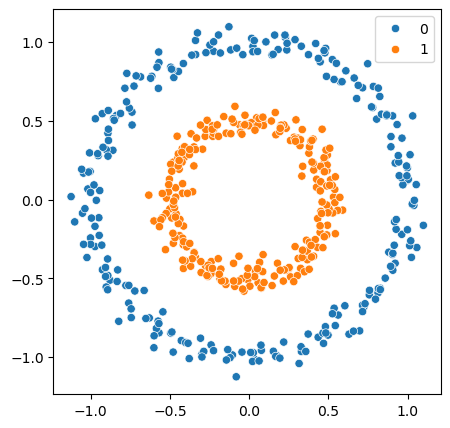

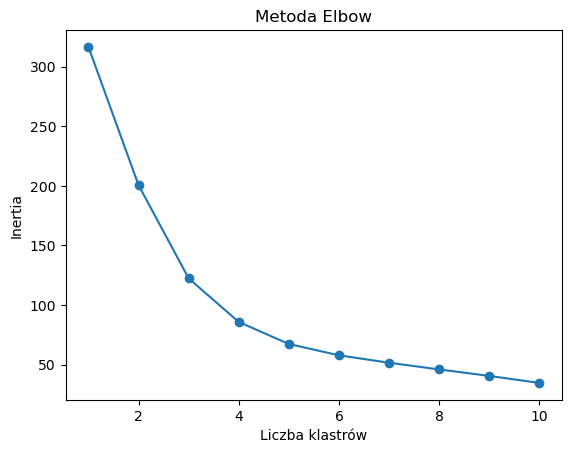

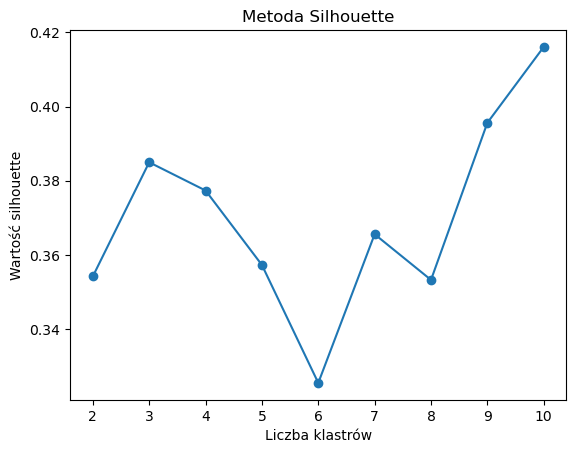

In [86]:
# Tworzymy zbiór danych w kształcie dwóch koncentrycznych okręgów
data_circles, labels_circles = make_circles(n_samples=500, factor=0.5, noise=0.05)

plt.figure(figsize=(5,5))
sns.scatterplot(x = data_circles[:,0], y = data_circles[:,1], hue = labels_circles)
plt.show()

plotuj_elbow(data_circles[:,:2])
plotuj_silhouette(data_circles[:,:2])

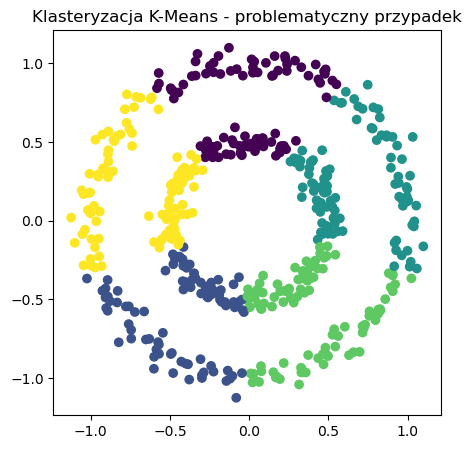

In [96]:
plt.figure(figsize=(5,5))
kmeans_circles = KMeans(n_clusters=5, random_state=42)
kmeans_circles.fit(data_circles)
clusters_circles = kmeans_circles.predict(data_circles)

# Wizualizacja wyników
plt.scatter(data_circles[:, 0], data_circles[:, 1], c=clusters_circles, cmap='viridis')
plt.title("Klasteryzacja K-Means - problematyczny przypadek")
plt.show()

Przykład klasteryzacji metodą DBSCAN.


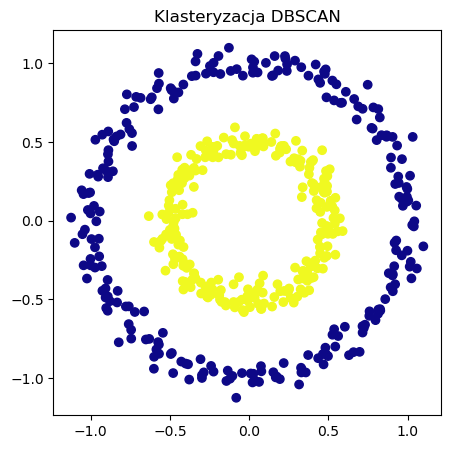

In [101]:
plt.figure(figsize=(5,5))
# DBSCAN - metoda oparta na gęstości
print("Przykład klasteryzacji metodą DBSCAN.")
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_circles)
plt.scatter(data_circles[:, 0], data_circles[:, 1], c=clusters_dbscan, cmap='plasma')
plt.title("Klasteryzacja DBSCAN")
plt.show()
